In [1]:
!pip install xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# Generate synthetic classification data
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_classes=2,
    n_redundant=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize and train the XGBoost Classifier
xgb_clf = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_clf.fit(X_train, y_train)

xgb_preds = xgb_clf.predict(X_test)

# Evaluate XGBoost
xgb_acc = accuracy_score(y_test, xgb_preds)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_preds))

XGBoost Accuracy: 0.9200
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       102
           1       0.95      0.89      0.92        98

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:22:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [5]:
# Initialize and train the LightGBM Classifier
lgbm_clf = LGBMClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42
)

lgbm_clf.fit(X_train, y_train)

lgbm_preds = lgbm_clf.predict(X_test)

# Evaluate LightGBM
lgbm_acc = accuracy_score(y_test, lgbm_preds)
print(f"LightGBM Accuracy: {lgbm_acc:.4f}")
print("Classification Report for LightGBM:")
print(classification_report(y_test, lgbm_preds))

[LightGBM] [Info] Number of positive: 402, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [6]:
# Initialize and train the CatBoost Classifier
catboost_clf = CatBoostClassifier(
    learning_rate=0.1,
    depth=3,
    iterations=100,
    verbose=0,
    random_state=42
)

catboost_clf.fit(X_train, y_train)

catboost_preds = catboost_clf.predict(X_test)

# Evaluate CatBoost
catboost_acc = accuracy_score(y_test, catboost_preds)
print(f"CatBoost Accuracy: {catboost_acc:.4f}")
print("Classification Report for CatBoost:")
print(classification_report(y_test, catboost_preds))

CatBoost Accuracy: 0.8900
Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       102
           1       0.91      0.86      0.88        98

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



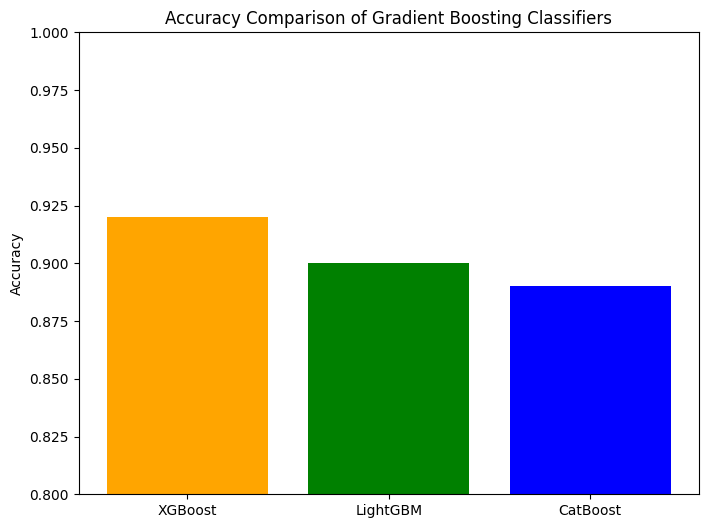

In [7]:
models = ['XGBoost', 'LightGBM', 'CatBoost']
accuracies = [xgb_acc, lgbm_acc, catboost_acc]

# Plot accuracy for each model
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['orange', 'green', 'blue'])
plt.title('Accuracy Comparison of Gradient Boosting Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()